In [1]:
from eval_gamefile import *

In [2]:
# save_game_eval(low_game_prun, 'low_game_prun_3.p')
low_game_base=load_eval('lowgame1.pgn4base.p')
low_game_rule=load_eval('lowgame1.pgn4rule.p')

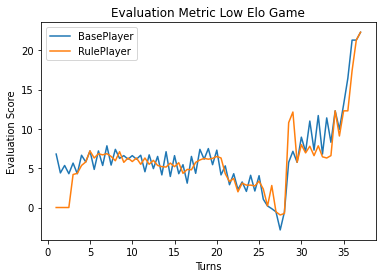

In [3]:
import matplotlib.pyplot as plt
import numpy as np
low_gameorder = np.arange(1,  1+ len(low_game_base[1])/2 , 0.5)
plt.title('Evaluation Metric Low Elo Game')
plt.plot(low_gameorder, low_game_base[1], label = 'BasePlayer')
plt.plot(low_gameorder, low_game_rule[1], label = 'RulePlayer')
plt.legend()
plt.ylabel('Evaluation Score')
plt.xlabel('Turns')
plt.savefig('low_game_eval.jpg')

In [4]:
from stockfish import Stockfish

In [5]:
stockfish = Stockfish("stockfish/stockfish_13")


In [6]:
stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")


In [37]:
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")
def compare_with_stockfish(eval_game):
    stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
    
    suggested_moves = eval_game[-2]
    game_configs = eval_game[2]
    print(len(suggested_moves), len(game_configs))
    evals = []
    # print(suggested_moves)
    for i in range(1, len(game_configs)-1):
        temp = game_configs[i-1]
        print(temp)
        temp.push(temp.san(suggested_moves[i]))
        stockfish.set_fen_position(temp.fen())
        stockfish_eval = stockfish.get_evaluation()
        print(stockfish_eval)
        evals.append(stockfish_eval)
    return evals

In [38]:
compare_with_stockfish(low_game_base)

73 73
. . . r . . . .
. p . . . . k .
. . B . . p p .
p . q . . . . .
. . P . P . . .
. . K . . P . .
P P . . . . . .
. . . . . . . R


AssertionError: san() and lan() expect move to be legal or null, but got c1d2 in 3r4/1p4k1/2B2pp1/p1q5/2P1P3/2K2P2/PP6/7R w - - 1 38

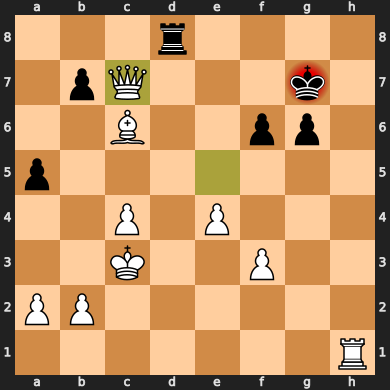

In [61]:
low_game_base[2][0]